<a href="https://colab.research.google.com/github/AshwinMahajan710/Deep-Learning-Practice-Projects/blob/main/01_Customer_Churn_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
# Necesssary imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [25]:
# reading the csv file
data = pd.read_csv("Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [26]:
data.shape

(10000, 14)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [28]:
data.duplicated().sum()

0

In [29]:
data["Exited"].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [30]:
data["Geography"].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [31]:
data["Gender"].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [32]:
# Total columns in the data
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [33]:
# dropping the 3 unnecessary columns
data.drop(columns = ['RowNumber','CustomerId','Surname'],inplace = True)

In [34]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [37]:
# Encodeing values
data = pd.get_dummies(data,columns = ["Geography","Gender"],drop_first=True).astype(int)

In [38]:
data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0,1,1,1,101348,1,0,0,0
1,608,41,1,83807,1,0,1,112542,0,0,1,0
2,502,42,8,159660,3,1,0,113931,1,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0,0
4,850,43,2,125510,1,1,1,79084,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0,2,1,0,96270,0,0,0,1
9996,516,35,10,57369,1,1,1,101699,0,0,0,1
9997,709,36,7,0,1,0,1,42085,1,0,0,0
9998,772,42,3,75075,2,1,0,92888,1,1,0,1


In [39]:
#Train Test Split
from sklearn.model_selection import train_test_split
X = data.drop(columns=["Exited"])
y = data["Exited"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [54]:
# Scaling is necessary in NN beacuse if data we have is not scalled there are so many chances that the weight convergence will be not proper
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_train_test = sc.fit_transform(X_test)

In [55]:
# Necessary imports
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [56]:
# Model initialization
model = Sequential()
model.add(Dense(3,activation = "sigmoid",input_dim = 11))
model.add(Dense(1,activation = "sigmoid"))

In [57]:
# Model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 3)                 36        
                                                                 
 dense_3 (Dense)             (None, 1)                 4         
                                                                 
Total params: 40 (160.00 Byte)
Trainable params: 40 (160.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [58]:
# model compilation
model.compile(loss="binary_crossentropy",optimizer="adam")

In [59]:
# fitting the date in model
model.fit(X_train_scaled,y_train,epochs= 10)

Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.5320
Epoch 2/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4895
Epoch 3/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4709
Epoch 4/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4595
Epoch 5/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4509
Epoch 6/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4445
Epoch 7/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4396
Epoch 8/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4359
Epoch 9/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4331
Epoch 10/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4309


In [60]:
# Getting the weights initialized by the model at input layer
model.layers[0].get_weights()

[array([[ 0.5586505 , -0.08985765,  0.0406379 ],
        [-0.97177726, -1.8512683 , -1.0519811 ],
        [ 0.05076299, -0.06739406,  0.11816617],
        [-0.597008  , -0.18728462, -0.28431925],
        [ 0.06386961,  0.01383866,  0.29523414],
        [-0.24249874,  0.08862267,  0.05643057],
        [ 1.0236887 ,  0.13109991,  0.9274003 ],
        [ 0.3760325 , -0.11018548, -0.1904568 ],
        [-0.21209499, -0.29634288, -0.8636748 ],
        [ 0.24400532, -0.12469958,  0.10744574],
        [ 0.649097  ,  0.4735822 ,  0.46601504]], dtype=float32),
 array([0.18057486, 0.06783694, 0.28841   ], dtype=float32)]

In [62]:
# Getting the weights initialized by the model at first layer
model.layers[1].get_weights()

[array([[-0.736608 ],
        [-1.1990734],
        [-1.0716267]], dtype=float32),
 array([-0.00175254], dtype=float32)]

In [65]:
# Prediction over the trained model
y_log = model.predict(X_train_test)

63/63 [==============================] - 0s 2ms/step


In [67]:
# Converting sigmoid output to binary format
np.where(y_log>0.5,1,0)

In [71]:
# Storing the results so we can further use them
history = model.fit(X_train_scaled,y_train,epochs= 10)

Epoch 1/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4292
Epoch 2/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4278
Epoch 3/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4267
Epoch 4/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4257
Epoch 5/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4248
Epoch 6/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4239
Epoch 7/10
250/250 [==============================] - 1s 5ms/step - loss: 0.4231
Epoch 8/10
250/250 [==============================] - 1s 5ms/step - loss: 0.4224
Epoch 9/10
250/250 [==============================] - 1s 4ms/step - loss: 0.4216
Epoch 10/10
250/250 [==============================] - 3s 11ms/step - loss: 0.4208


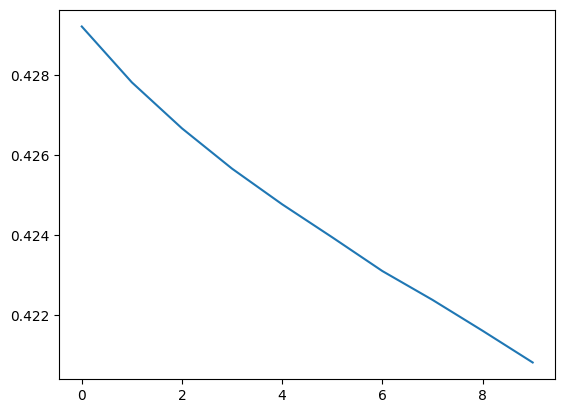

In [72]:
# Calculating the average loss change
plt.plot(history.history['loss'])